In [17]:
import numpy as np
#import numpy.ma as ma
from uncertainties import ufloat, unumpy
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Issues with getting \micro to work
# See: https://stackoverflow.com/questions/22348756/upright-mu-in-plot-label-retaining-original-tick-fonts
# See: https://tex.stackexchange.com/questions/358064/upright-and-sans-serif-%C2%B5

In [19]:
# Maybe try using pgf? 
# See: http://notmatthancock.github.io/2018/02/27/matplotlib-latex-reference.html

In [20]:
# https://stackoverflow.com/questions/22348756/upright-mu-in-plot-label-retaining-original-tick-fonts
# https://stackoverflow.com/questions/2537868/sans-serif-math-with-latex-in-matplotlib

import matplotlib
from matplotlib import rc

matplotlib.rc('text', usetex = True)
matplotlib.rc('font', **{'family':'sans-serif'})

## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})

#params = {'text.latex.preamble':[r'\usepackage{siunitx}',
#                                 r'\usepackage{amsmath}',
#                                 r'\usepackage{physics}',
#                                 r'\usepackage{sfmath}',
#                                 r'\sisetup{detect-all=true}']}

params = {'text.latex.preamble':[r'\usepackage{siunitx}',
                                 r'\usepackage{amsmath}',
                                 r'\usepackage{physics}',
                                 r'\usepackage{helvet}',
                                 r'\usepackage{sansmath}',
                                 r'\sansmath',
                                 r'\sisetup{detect-all}']}
plt.rcParams.update(params)

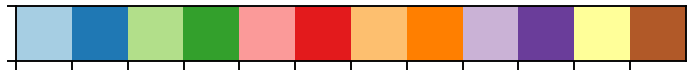

In [21]:
sns.set_context('talk')
sns.palplot(sns.color_palette("Paired"))

# Constants

In [22]:
C = 299792458 # Speed of light in [m/s]

In [23]:
wavelength = 1064E-9 # [m] (approximate) wavelength of dimple light

# Functions

In [24]:
def waist_z(z, z0, w0):
    zR = np.pi*(w0**2)/wavelength
    w_squared = (w0**2)*(1+((z-z0)**2)/(zR**2))
    return unumpy.sqrt(w_squared)

def waist_z_with_M2(z, z0, w0, M2):
    zR = np.pi*(w0**2)/wavelength/M2
    w_squared = (w0**2)*(1+((z-z0)**2)/(zR**2))
    return unumpy.sqrt(w_squared)

# Read in data

In [25]:
# 'Sheet1' was a sheet specifically created so I can read in the data with minimal formatting.
data = pd.read_excel('Vertical_Rev2-20170808.xlsx', sheet_name='Sheet1')

# Plotting

In [28]:
# Fitted beam parameters

# Horizontal waist
z0x = ufloat(36.2058, 0.104342)/100 # Horizontal waist location in [m]
w0x = ufloat(73.6688, 4.24512)/1E6 # Horizontal waist location in [m]
M2x = ufloat(1.01936, 0.0555078)

# Vertical waist
z0y = ufloat(36.5827, 0.111575)/100 # Vertical waist location in [m]
w0y = ufloat(67.8765, 5.64935)/1E6 # Horizontal waist location in [m]
M2y = ufloat(1.04557, 0.0757719)

z_fit = np.linspace(-10E-2, 60E-2, 1000)
wx_fit = waist_z_with_M2(z_fit, z0x, w0x, M2x)
wy_fit = waist_z_with_M2(z_fit, z0y, w0y, M2y)

# Scaling for plotting
z_fit = z_fit*100 # [cm]
wx_fit = wx_fit*1E6 # [um]
wy_fit = wy_fit*1E6 # [um]

print(w0x*1E6)
print(z0x*100)

print(w0y*1E6)
print(z0y*100)

74+/-4
36.21+/-0.10
68+/-6
36.58+/-0.11


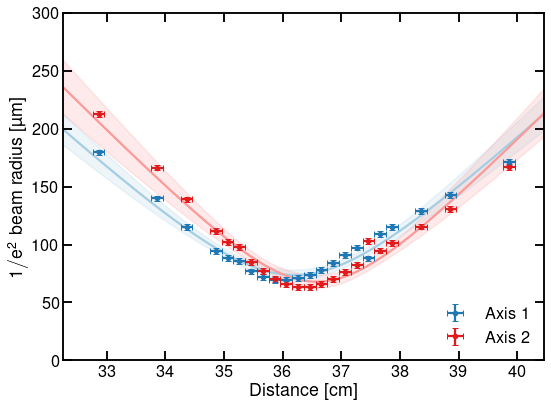

In [34]:
# Data plot options
data_kwargs = {'fmt':'.'}

# Data from excel file
z = data['Calculated dist [cm]'] # Distances from reference point in [m]
wx = unumpy.uarray(data['W width e^-2 [um]'], data['W std. dev. [um]'])/2 # Radius from width in [um]
wy = unumpy.uarray(data['V width e^-2 [um]'], data['V std. dev. [um]'])/2 # Radius from width in [um]

# Plotting
plt.figure(figsize=(8,6))

# Assuming 1 mm measurement error
plt.errorbar(z, unumpy.nominal_values(wx), xerr=1/10, yerr=unumpy.std_devs(wx), **data_kwargs, 
             color=sns.color_palette("Paired")[1], capsize=3, 
             label=r'Axis 1', zorder=2)
# Assuming 1 mm measurement error
plt.errorbar(z, unumpy.nominal_values(wy), xerr=1/10, yerr=unumpy.std_devs(wy), **data_kwargs,
             color=sns.color_palette("Paired")[5], capsize=3, 
             label=r'Axis 2', zorder=2)


plt.plot(z_fit, unumpy.nominal_values(wx_fit), color=sns.color_palette("Paired")[0], label=r'', zorder=1)
plt.fill_between(z_fit,
                 unumpy.nominal_values(wx_fit) + unumpy.std_devs(wx_fit),
                 unumpy.nominal_values(wx_fit) - unumpy.std_devs(wx_fit),
                 alpha=0.2,
                 color=sns.color_palette("Paired")[0], label=r'', zorder=0)

plt.plot(z_fit, unumpy.nominal_values(wy_fit), color=sns.color_palette("Paired")[4], label=r'', zorder=1)
plt.fill_between(z_fit,
                 unumpy.nominal_values(wy_fit) + unumpy.std_devs(wy_fit),
                 unumpy.nominal_values(wy_fit) - unumpy.std_devs(wy_fit),
                 alpha=0.2,
                 color=sns.color_palette("Paired")[4], label=r'', zorder=0)

# Tick settings
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.gca().tick_params(axis='both',direction='in')

# Axis limits
plt.xlim(min(z)-0.6, max(z)+0.6)
plt.ylim(0, 300)

# Axes labels
#plt.xlabel(r'Distance from end of cage system [cm]')
plt.xlabel(r'Distance [\si{cm}]')
plt.ylabel(r'$\flatfrac{1}{\rm{e}^2}$ beam radius [\si{\um}]')

plt.legend(loc='lower right', frameon=False)

plt.tight_layout()
plt.savefig('vertical_profile.pdf', bbox_inches='tight')
plt.show()